¡Hola, Gabriel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Gabriel! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hola Tonatiuh, muchas gracias por las correcciones que me realizáste, ahora siento más organizádo mi trabajo, tambien gracias por los comentarios de apoya :)

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con la carga de la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
llamadas=pd.read_csv("C:\Users\gabri\proy_concluidos\megaline_calls.csv")

consumo_gigas=pd.read_csv("C:\Users\gabri\proy_concluidos\megaline_internet.csv")

mensajes=pd.read_csv("C:\Users\gabri\proy_concluidos\megaline_messages.csv")

planes=pd.read_csv("C:\Users\gabri\proy_concluidos\megaline_plans.csv")

users=pd.read_csv("C:\Users\gabri\proy_concluidos\megaline_users.csv")




## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
# llamadas.info()
# print(llamadas.head())
# print("##consumo##")
# consumo_gigas.info()
# print(consumo_gigas.head(20))
# print("##mensajes##")
# mensajes.info()
# print(mensajes.head())
# print("##planes##")
# planes.info()
# print(planes.head())
print("##users##")
users.info()
# print(users.head())

##users##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [51]:
llamadas["call_date"]=pd.to_datetime(llamadas["call_date"],format='%Y-%m-%d')

In [5]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

planes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Imprime una muestra de los datos para las tarifas
planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

considero que en general la info está completa y no es necesario realizar cambios en ella , sin embargo, sí es necesario hacer la conversión de mb a gb en el dataframe "consumo_gigas" para poder calcular el valor del excedente para cada plan

## Usuarios/as

In [8]:
users=users[users["churn_date"].isna()]

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [48]:
users["reg_date"]=pd.to_datetime(users["reg_date"], format='%Y-%m-%d')


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
users["mes"]=users["reg_date"].dt.month

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(llamadas.head())


         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


In [12]:
# Imprime una muestra de datos para las llamadas

llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
def redondeo(fila):
    return math.ceil(fila)

llamadas["duración_redondeada"]=llamadas["duration"].apply(redondeo)
llamadas["mes"]=llamadas["call_date"].dt.month

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
mensajes.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [49]:
mensajes["message_date"]=pd.to_datetime(mensajes["message_date"], format='%Y-%m-%d')
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
mensajes["mes"]=mensajes["message_date"].dt.month
mensajes

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

consumo_gigas

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [19]:
# Imprime una muestra de datos para el tráfico de internet
consumo_gigas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [50]:
consumo_gigas["session_date"]=pd.to_datetime(consumo_gigas["session_date"],format='%Y-%m-%d')
consumo_gigas["consumo_redondeado"]=consumo_gigas["mb_used"].apply(redondeo)


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
consumo_gigas["mes"]=consumo_gigas["session_date"].dt.month
consumo_gigas

,id,user_id,session_date,mb_used,consumo_redondeado,mes
0,1000_13,1000,2018-12-29,89.86,90,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,661,12
3,1000_413,1000,2018-12-26,270.99,271,12
4,1000_442,1000,2018-12-27,880.22,881,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,219,10
104821,1499_216,1499,2018-12-30,304.72,305,12
104822,1499_217,1499,2018-09-22,292.75,293,9
104823,1499_218,1499,2018-12-07,0.00,0,12


cuando se haga la agrupación de los dátos, se redondeará el valor de "mb_used" con el método math.ceil() que redondea hacia el entero superior más cercano, método comveniente según las políticas de la empresa.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [23]:
llamadas.head()


,id,user_id,call_date,duration,duración_redondeada,mes
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_mes=llamadas.pivot_table(index=["user_id", "mes"], values="duration", aggfunc="count").reset_index()
llamadas_por_mes.columns=["user_id","mes","cantidad"]
llamadas_por_mes

,user_id,mes,cantidad
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! la función de pivot_table() es muy recomendable para hacer los códigos más eficientes. Solamente te recomendaria que puedes agregar las siguientes varaibles a la función para que se vean más claros los resultados: 
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()


    
</div>

In [32]:
# Añade la información de la tarifa



In [56]:
llamadas_sms=llamadas_comprimido.merge(mensajes_por_mes, on=["user_id", "mes"], how="inner")
llamadas_sms_gg=llamadas_sms.merge(consumo_gigas_comprimido, on=["user_id", "mes"], how="inner")
llamadas_sms_gg["consumo_redondeado"]=llamadas_sms_gg["consumo_redondeado"]


info_general=llamadas_sms_gg.merge(users_comprimido, on="user_id", how="inner")
info_general=info_general.merge(planes, on="plan", how="inner")
info_general

,user_id,mes,duración_redondeada,cantidad_de_sms,consumo_redondeado,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124,11,1903,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1008,10,476,21,17131,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1008,11,446,37,23706,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,12,634,26,14707,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1011,6,118,21,6695,ultimate,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,1496,8,122,2,8616,surf,50,15360,500,20,10,0.03,0.03
1637,1496,9,414,21,16412,surf,50,15360,500,20,10,0.03,0.03
1638,1496,10,317,18,14308,surf,50,15360,500,20,10,0.03,0.03
1639,1496,11,308,13,8561,surf,50,15360,500,20,10,0.03,0.03


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda completar el calculo del ingreso mensual por usuario partiendo de la base deonde hiciste el merge de todas las bases

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [33]:
# Calcula el ingreso mensual para cada usuario



In [57]:
def coste_mensual(fila):
    coste_mensual= fila["usd_monthly_pay"]
    if fila["duración_redondeada"]> fila["minutes_included"]:
        coste_mensual+=(fila["duración_redondeada"]-fila["minutes_included"])*fila["usd_per_minute"]
    if fila["cantidad_de_sms"]>fila["messages_included"]:
        coste_mensual+=(fila["cantidad_de_sms"]-fila["messages_included"])*fila["usd_per_message"]
    if fila["consumo_redondeado"]>fila["mb_per_month_included"]:
        coste_mensual+=math.ceil((fila["consumo_redondeado"]-fila["mb_per_month_included"])/1024)*fila["usd_per_gb"]
    return coste_mensual

In [58]:
info_general["coste_mensual"]=info_general.apply(coste_mensual, axis=1)

In [59]:
info_general_surf=info_general[info_general["plan"]=="surf"]
info_general_ultimate=info_general[info_general["plan"]=="ultimate"]

In [74]:
print("media del coste mensual del plan surf, teniendo en cuenta que el valor base del plan es $20:", math.ceil(info_general_surf["coste_mensual"].mean()))
print("mediana del coste mensual del plan surf, la mediana es menos suceptible ante valoresa atípicos, por lo que es un valor medio más real en este caso",math.ceil(info_general_surf["coste_mensual"].median()))
print("______________________________________________________________________________________________________________________________")
print("media del coste mensual del plan ultimate, teniendo en cuenta que el valor base del plan es $70:", math.ceil(info_general_ultimate["coste_mensual"].mean()))
print("mediana del coste mensual del plan ultimate, la mediana es menos suceptible ante valoresa atípicos, por lo que es un valor medio más real en este caso:",math.ceil(info_general_ultimate["coste_mensual"].median()))


media del coste mensual del plan surf, teniendo en cuenta que el valor base del plan es $20: 61
mediana del coste mensual del plan surf, la mediana es menos suceptible ante valoresa atípicos, por lo que es un valor medio más real en este caso 42
______________________________________________________________________________________________________________________________
media del coste mensual del plan ultimate, teniendo en cuenta que el valor base del plan es $70: 73
mediana del coste mensual del plan ultimate, la mediana es menos suceptible ante valoresa atípicos, por lo que es un valor medio más real en este caso: 70


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
planes.columns=("messages_included","mb_per_month_included", "minutes_included", "usd_monthly_pay", "usd_per_gb", "usd_per_message", "usd_per_minute", "plan")
users_plan=users.loc[:,["user_id", "plan"]]
users_plan=users_plan.merge(llamadas, on="user_id", how="inner")
llamadas_según_plan=users_plan.merge(planes, on="plan", how="inner")
llamadas_según_plan.head(1)

,user_id,plan,id,call_date,duration,duración_redondeada,mes,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,1000_93,2018-12-27,8.52,9,12,1000,30720,3000,70,7,0.01,0.01


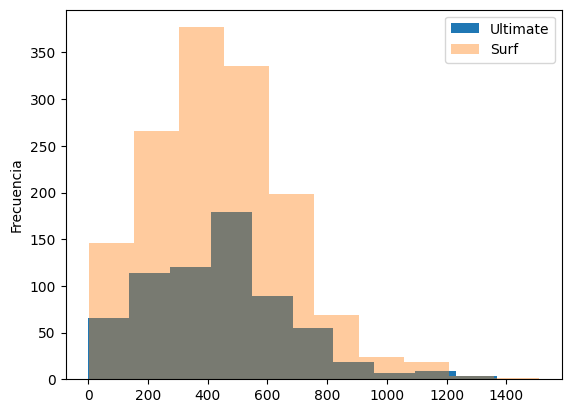

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
llamadas_según_plan.pivot_table(index=["user_id", "plan", "mes"], values="duración_redondeada", aggfunc=("sum")).reset_index()

ultimate_data=llamadas_según_plan[llamadas_según_plan["plan"]=="ultimate"]
surf_data=llamadas_según_plan[llamadas_según_plan["plan"]=="surf"]
duración_llamadas_ultimate=ultimate_data.pivot_table(index=["user_id", "mes"], values="duración_redondeada", aggfunc=(sum)).reset_index()
duración_llamadas_surf=surf_data.pivot_table(index=["user_id", "mes"], values="duración_redondeada", aggfunc=(sum)).reset_index()
plt.hist(duración_llamadas_ultimate["duración_redondeada"], alpha=1, label='Ultimate')
plt.hist(duración_llamadas_surf["duración_redondeada"], alpha=0.4, label='Surf')
plt.legend()
plt.ylabel('Frecuencia')  # yiyulo
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [36]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("media de la duración por mes en plan ultimate:", duración_llamadas_ultimate["duración_redondeada"].mean())
print("media de la duración por mes en plan surf:", duración_llamadas_surf["duración_redondeada"].mean())
varianza_ultimate=np.var(duración_llamadas_ultimate["duración_redondeada"])
varianza_surf=np.var(duración_llamadas_surf["duración_redondeada"])
print("varianza de la duración por mes en el plan surf:", varianza_surf )
print("varianza de la duración por mes en el plan ultimate:", varianza_ultimate)

media de la duración por mes en plan ultimate: 435.8789712556732
media de la duración por mes en plan surf: 439.29186935371786
varianza de la duración por mes en el plan surf: 53140.406820619486
varianza de la duración por mes en el plan ultimate: 58298.94450484185


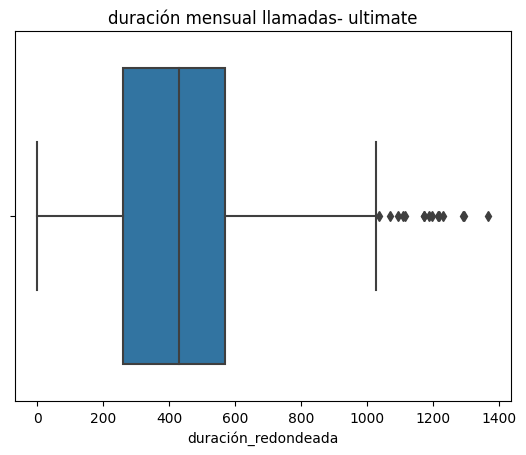

Text(0.5, 1.0, 'duración mensual llamadas- surf')

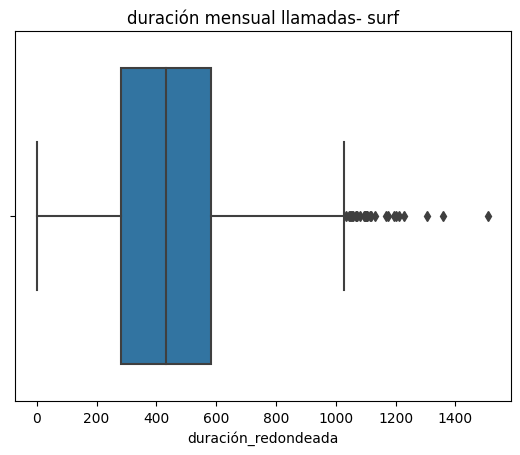

In [37]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(duración_llamadas_ultimate["duración_redondeada"])
plt.title("duración mensual llamadas- ultimate")
plt.show()
sns.boxplot(duración_llamadas_surf["duración_redondeada"])
plt.title("duración mensual llamadas- surf")
 

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

apartir de las pruebas hechas a las muestras, podemos empezar a comprobar que las muestras tienen una distribnución muy parecida y que a pesar de las limitaciones individuales de cada plan, los clientes tienden a utilizar la misma cantidad de minutos en llamada por mes. Desde ahora podriamos deducir que en el aspecto de llamadas es mas rentable el plan surf, debido a que cadda minuto adicional tiene un valor mayor. 

### Mensajes

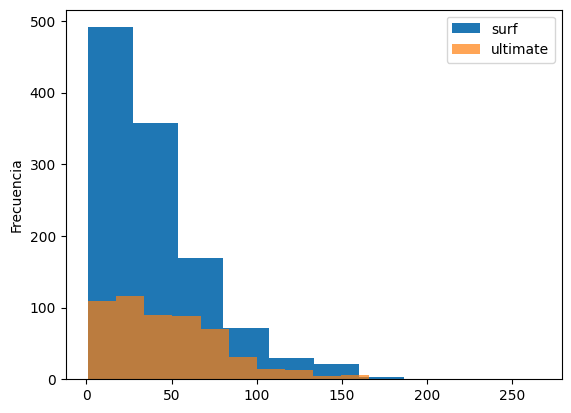

In [38]:
sms_info=mensajes.merge(users, on="user_id", how="inner").loc[ :, ["id", "user_id", "mes_x", "plan"]]
sms_ultimate=sms_info[sms_info["plan"]=="ultimate"]
sms_surf=sms_info[sms_info["plan"]=="surf"]
sms_ultimate=sms_ultimate.pivot_table(index=["user_id", "mes_x"], values="id", aggfunc="count").reset_index()
sms_surf=sms_surf.pivot_table(index=["user_id", "mes_x"], values="id", aggfunc="count").reset_index()
plt.hist(sms_surf["id"], alpha=1, label="surf")
plt.hist(sms_ultimate["id"], alpha=0.7, label="ultimate")
plt.legend()
plt.ylabel("Frecuencia")
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [39]:

consumo_gigas=consumo_gigas.merge(users, on="user_id", how="inner")
consumo_gigas.loc[:, ["id","user_id","consumo_redondeado", "mes_x", "plan"]]


,id,user_id,consumo_redondeado,mes_x,plan
0,1000_13,1000,90,12,ultimate
1,1000_204,1000,0,12,ultimate
2,1000_379,1000,661,12,ultimate
3,1000_413,1000,271,12,ultimate
4,1000_442,1000,881,12,ultimate
...,...,...,...,...,...
97354,1499_215,1499,219,10,surf
97355,1499_216,1499,305,12,surf
97356,1499_217,1499,293,9,surf
97357,1499_218,1499,0,12,surf


In [40]:
gigas_surf=consumo_gigas[consumo_gigas["plan"]=="surf"]
gigas_ultimate=consumo_gigas[consumo_gigas["plan"]=="ultimate"]
gigas_surf.pivot_table(index=["user_id", "mes_x"], values="consumo_redondeado", aggfunc="sum").reset_index()
gigas_ultimate.pivot_table(index=["user_id", "mes_x"], values="consumo_redondeado", aggfunc="sum").reset_index()

,user_id,mes_x,consumo_redondeado
0,1000,12,1903
1,1008,10,17131
2,1008,11,23706
3,1008,12,14707
4,1011,6,6695
...,...,...,...
662,1493,9,15009
663,1493,10,16351
664,1493,11,15650
665,1493,12,15307


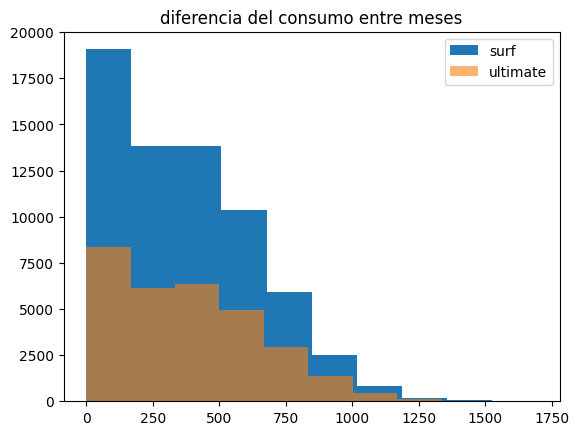

In [41]:
plt.hist(gigas_surf["consumo_redondeado"], alpha=1, label="surf")
plt.title("diferencia del consumo entre meses")

plt.hist(gigas_ultimate["consumo_redondeado"], alpha=0.6, label="ultimate")
plt.legend()
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Se puede identificar una relación directa entre los planes, y la mayoría de la población en los dos planes se encuetra en un rango de consumo menor a 750

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [42]:
llamadas_comprimido=llamadas.loc[:,[ "user_id", "duración_redondeada", "mes"]]
llamadas_comprimido
llamadas_comprimido=llamadas_comprimido.pivot_table(index=["user_id", "mes"], values="duración_redondeada", aggfunc="sum").reset_index()

In [43]:
consumo_gigas
consumo_gigas_comprimido=consumo_gigas.loc[:, [ "user_id", "consumo_redondeado", "mes_x"]]
consumo_gigas_comprimido.columns=("user_id", "consumo_redondeado","mes")
consumo_gigas_comprimido=consumo_gigas_comprimido.pivot_table(index=["user_id", "mes"], values="consumo_redondeado", aggfunc="sum").reset_index()

In [44]:
planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [45]:
users_comprimido=users.loc[:,["user_id", "plan"]]
users_comprimido


,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [46]:

mensajes_por_mes.columns=("user_id", "mes", "cantidad_de_sms")
mensajes_por_mes

,user_id,mes,cantidad_de_sms
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [61]:
llamadas_sms_gg

,user_id,mes,duración_redondeada,cantidad_de_sms,consumo_redondeado
0,1000,12,124,11,1903
1,1001,8,182,30,6929
2,1001,9,315,44,13333
3,1001,10,393,53,22356
4,1001,11,426,36,18524
...,...,...,...,...,...
1636,1496,9,414,21,16412
1637,1496,10,317,18,14308
1638,1496,11,308,13,8561
1639,1496,12,294,11,16460


In [62]:
info_general

,user_id,mes,duración_redondeada,cantidad_de_sms,consumo_redondeado,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,coste_mensual
0,1000,12,124,11,1903,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
1,1008,10,476,21,17131,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
2,1008,11,446,37,23706,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
3,1008,12,634,26,14707,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
4,1011,6,118,21,6695,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,1496,8,122,2,8616,surf,50,15360,500,20,10,0.03,0.03,20.0
1637,1496,9,414,21,16412,surf,50,15360,500,20,10,0.03,0.03,40.0
1638,1496,10,317,18,14308,surf,50,15360,500,20,10,0.03,0.03,20.0
1639,1496,11,308,13,8561,surf,50,15360,500,20,10,0.03,0.03,20.0


In [ ]:

sns.boxplot(info_general_surf["coste_mensual"])
plt.title("coste mensual- surf")
plt.show()
sns.boxplot(info_general_ultimate["coste_mensual"])
plt.title("coste mensual- ultimate")
 

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


en estos gráficos podemos observar que la media es superior al valor inicial del plan surf, lo que sugiere que existe un sobrecargo en gran parte de los servicios, además que el cuartil 4 decimoplica su valor, lo que es bastante elevado; a diferencia del plan ultimate que parece ser mas rentable para el cliente dado que en general no existe una desviación estandar fuera de su media que es el valor exacto del servicio y son pocos los casos aislados.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [76]:
#H0= las medias de las poblaciones del plan "ultimate" y surf son iguales
#H1= las media de la población del plan "surf" es mayor a la media de la población "ultimate"
alpha=0.05

In [77]:
# Prueba las hipótesis
resultado=st.ttest_ind(info_general_surf["coste_mensual"], info_general_ultimate["coste_mensual"], equal_var = False)
if (resultado.pvalue/2<alpha) and ((info_general_surf["coste_mensual"].mean())>(info_general_ultimate["coste_mensual"].mean())):
    print("rechazámos la hipótesis núla")
else:
    print("no es posible rechazar la hipótesis núla")
print(resultado.pvalue)

no es posible rechazar la hipótesis núla
4.122837526242321e-12



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [79]:
# Prueba las hipótesis

info_surf_por_ciudad= info_general.merge(users, on="user_id", how="inner").loc[:,["user_id", "coste_mensual", "city"], ]
info_ny=info_surf_por_ciudad[info_surf_por_ciudad["city"]=='New York-Newark-Jersey City, NY-NJ-PA MSA']
info_no_ny=info_surf_por_ciudad[info_surf_por_ciudad["city"]!='New York-Newark-Jersey City, NY-NJ-PA MSA']


In [80]:
# h0= la media de las poblaciones según las ciudades es la misma (NY y el resto)
# h1= la media de las poblaciones según las ciudades es distinta (NY y el resto)
alpha=0.05

In [81]:
resultado=st.ttest_ind(info_ny["coste_mensual"], info_no_ny["coste_mensual"], equal_var = False)
if resultado.pvalue<alpha:
    print("rechazámos la hipótesis núla")
else:
    print("no es posible rechazar la hipótesis núla")

rechazámos la hipótesis núla



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

apartir de esta prueba estadística podemos comprobar que las medias entre estas dos poblaciones son distintas. considero que es debido a la generalización de la población distinta a new york ya que es muy grande y las tendencias son mas generale.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En general se pudo rescatár información financiera importante reuniendo la información de los distintos dtasets presentes; aunque la media de la población del plan surf no es mayor de la média del plan ultimate, sí demostramos que es más rentable dado que genera ingresos extras que generan que la media esté por el doble del valor del plan. Además que es mas enganchable dado su bajo precio. poniendome en la po